In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import time
from scipy import stats
import datetime
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
 
import  os
import random
import math 
 
from sklearn.model_selection import train_test_split
import xgboost as xgb
 
random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
df=pd.read_csv('/content/drive/My Drive/Sel50_IoT_Intrusion_Dataset_2020.csv');
# df=pd.read_csv('/content/drive/My Drive/IoT Intrusion Dataset 2020.csv')

Mounted at /content/drive


In [ ]:
import ipaddress
df['Src_IP'] = df['Src_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Dst_IP'] = df['Dst_IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Timestamp']=pd.to_datetime(df['Timestamp']).astype(int)/10**9
# df['Flow_ID']=df['Src_IP']+df['Dst_IP']+df['Src_Port']+df['Dst_Port']+df['Protocol']
le=LabelEncoder()
# df.Label=le.fit_transform(df.Label)
df.Flow_ID=LabelEncoder().fit_transform(df.Flow_ID).astype(int)
df.Sub_Cat=le.fit_transform(df.Sub_Cat)
df.Sub_Cat=df.Sub_Cat.astype('category')
df.Label=le.fit_transform(df.Label).astype('int')
df.Cat=le.fit_transform(df.Cat).astype('int')
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
# df=df.apply(lambda row: row.fillna(row.mean()), axis=1)
df = df.astype(int)

In [ ]:
x1=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y1=df['Label']

In [ ]:
x2=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y2=df['Cat']

In [ ]:
x3=df.drop(['Sub_Cat','Cat','Label'],axis=1)
y3=df['Sub_Cat']

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

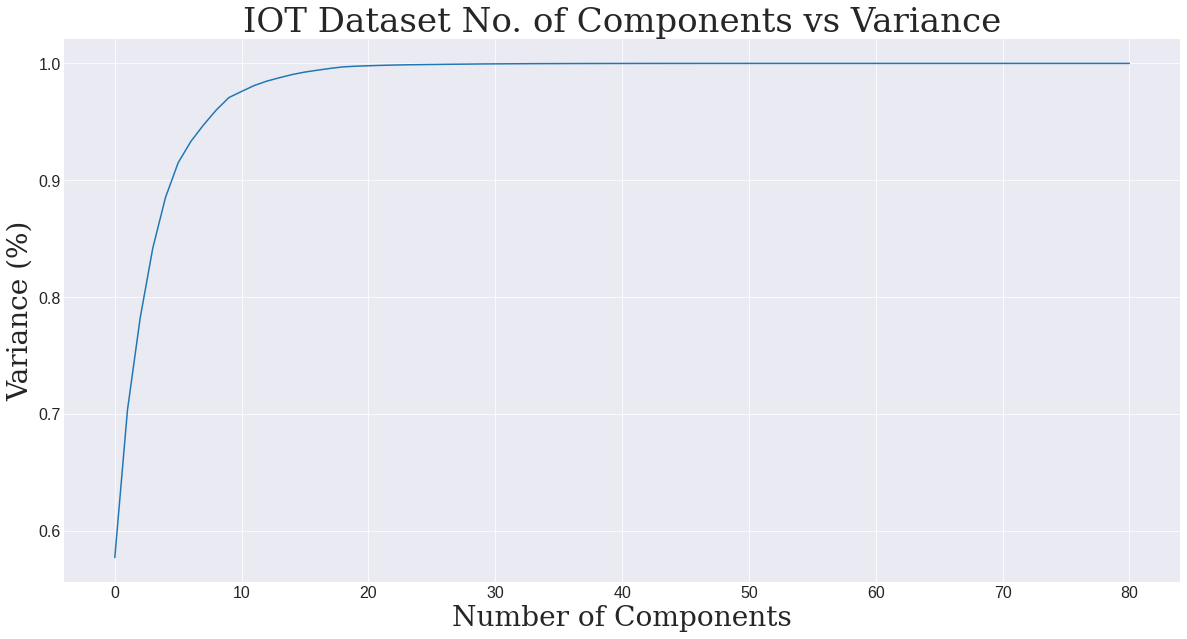

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler(feature_range=[0, 1])
data_rescaled1= scaler1.fit_transform(x1)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca1 = PCA().fit(data_rescaled1)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

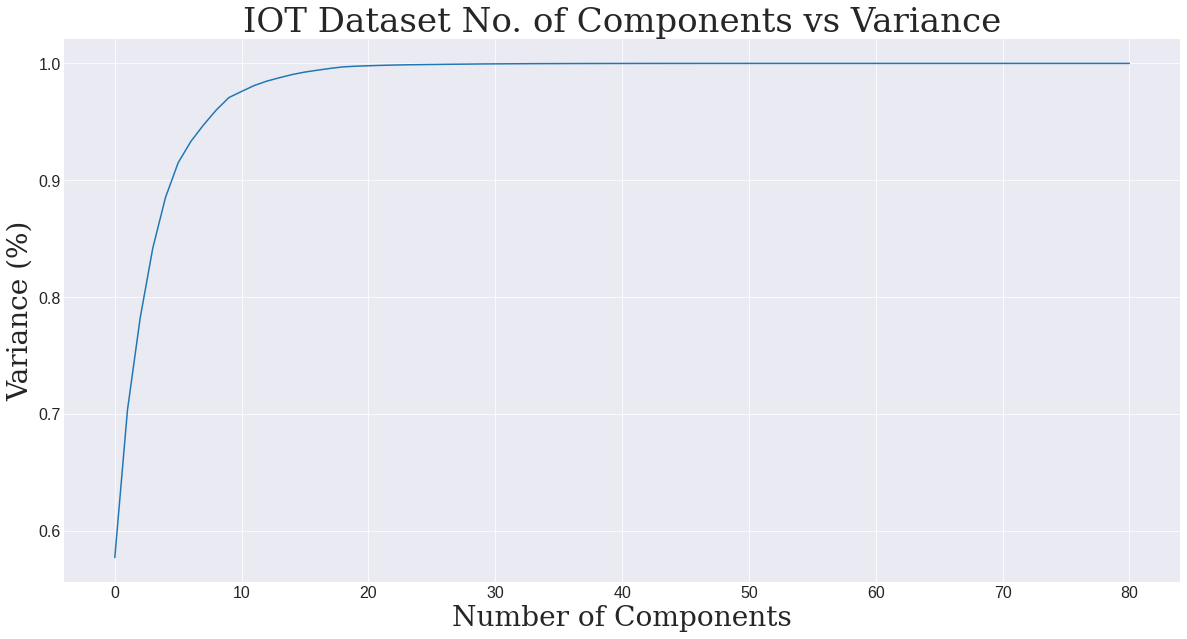

In [ ]:
scaler2 = MinMaxScaler(feature_range=[0, 1])
data_rescaled2= scaler2.fit_transform(x2)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca2 = PCA().fit(data_rescaled2)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

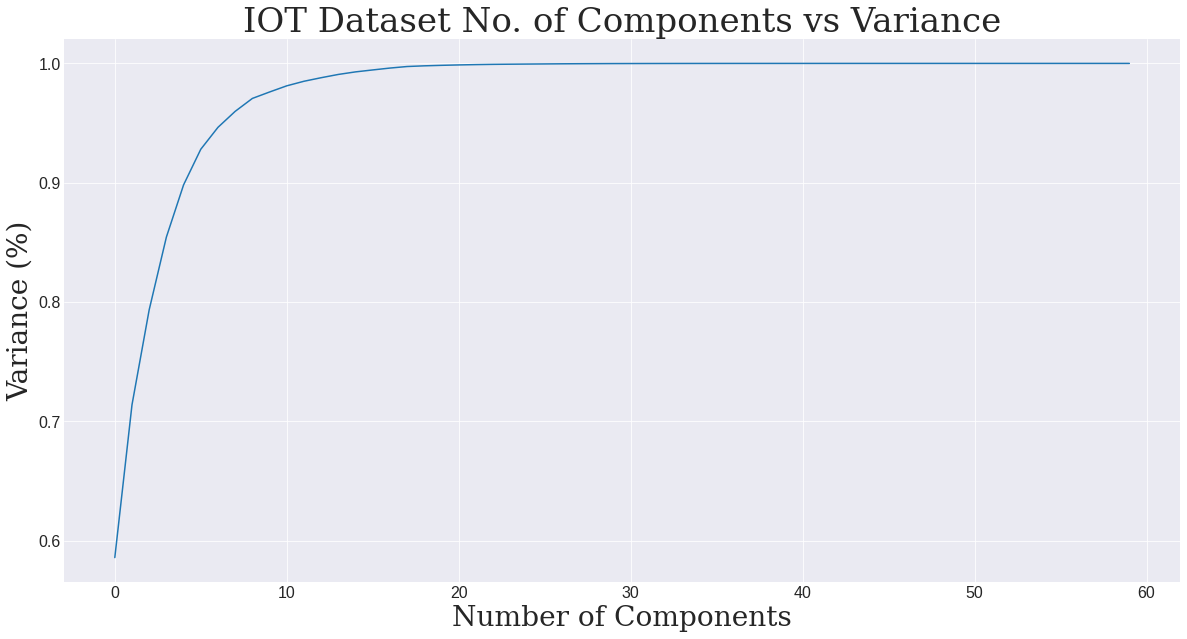

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler3 = MinMaxScaler(feature_range=[0, 1])
data_rescaled3= scaler3.fit_transform(x3)

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

pca3 = PCA().fit(data_rescaled3)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('IOT Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

In [ ]:
feature1=np.cumsum(pca3.explained_variance_ratio_)

In [ ]:
len(feature1[feature1 <= 0.99])

13

In [ ]:
pca3 = PCA(n_components=13)
x3 = pca3.fit_transform(data_rescaled3)

In [ ]:
feature2=np.cumsum(pca2.explained_variance_ratio_)

In [ ]:
len(feature2[feature2 <= 0.99])

14

In [ ]:
pca2 = PCA(n_components=14)
x2 = pca1.fit_transform(data_rescaled2)

In [ ]:
feature3=np.cumsum(pca3.explained_variance_ratio_)

In [ ]:
len(feature3[feature3 <= 0.99])

14

In [ ]:
pca3 = PCA(n_components=14)
x3 = pca1.fit_transform(data_rescaled3)

In [ ]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=0)
x_rest1,y_rest1=smk.fit_sample(x1,y1) 

In [ ]:
x_rest2,y_rest2=smk.fit_sample(x2,y2) 

In [ ]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=0)
x_rest3,y_rest3=smk.fit_sample(x3,y3)

In [ ]:
x_train1,x_test1,y_train1,y_test1 =train_test_split(x_rest1,y_rest1,test_size=0.2,random_state=42)
x_train1.shape,x_test1.shape

((937131, 14), (234283, 14))

In [ ]:
x_train2,x_test2,y_train2,y_test2 =train_test_split(x_rest2,y_rest2,test_size=0.2,random_state=42)
x_train2.shape,x_test2.shape

((1662698, 14), (415675, 14))

In [ ]:
x_train3,x_test3,y_train3,y_test3 =train_test_split(x_rest3,y_rest3,test_size=0.2,random_state=42)
x_train3.shape,x_test3.shape

((1294011, 13), (323503, 13))

Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_model1 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=5)   
clf_model1.fit(x_train1,y_train1)
y_pred_clf_model1 =clf_model1.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_clf_model1))
 
# xgboost provides R2 score
print ("Training score:",clf_model1.score(x_train1,y_train1),"Test Score:",clf_model1.score(x_test1,y_test1))

Accuracy: 0.99733228616673
Training score: 0.9975371639610684 Test Score: 0.99733228616673


In [ ]:
clf_model2 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=5)   
clf_model2.fit(x_train2,y_train2)
y_pred_clf_model2 =clf_model2.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_clf_model2))
 
# xgboost provides R2 score
print ("Training score:",clf_model2.score(x_train2,y_train2),"Test Score:",clf_model2.score(x_test2,y_test2))

Accuracy: 0.9820532868226379
Training score: 0.9823497712753609 Test Score: 0.9820532868226379


In [ ]:
clf_model3 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=5)   
clf_model3.fit(x_train3,y_train3)
y_pred_clf_model3 =clf_model3.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred_clf_model3))
 
# xgboost provides R2 score
print ("Training score:",clf_model3.score(x_train3,y_train3),"Test Score:",clf_model3.score(x_test3,y_test3))

Accuracy: 0.7656907038446136
Training score: 0.7683220437088372 Test Score: 0.7656907038446136


ExtraTree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf1 = ExtraTreesClassifier(n_estimators=10, max_depth=10,min_samples_split=2,n_jobs=1,random_state=0)
clf1.fit(x_train1,y_train1)
y_pred_clf1 =clf1.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_clf1))
 
# xgboost provides R2 score
print ("Training score:",clf1 .score(x_train1,y_train1),"Test Score:",clf1.score(x_test1,y_test1))

Accuracy: 0.9850650708758211
Training score: 0.9850181031253902 Test Score: 0.9850650708758211


In [ ]:
clf2 = ExtraTreesClassifier(n_estimators=10, max_depth=10,min_samples_split=2,n_jobs=1,random_state=0)
clf2.fit(x_train2,y_train2)
y_pred_clf2 =clf2.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_clf2))
 
# xgboost provides R2 score
print ("Training score:",clf2.score(x_train2,y_train2),"Test Score:",clf2.score(x_test2,y_test2))

Accuracy: 0.9561652733505743
Training score: 0.9563372302125822 Test Score: 0.9561652733505743


In [ ]:
clf3 = ExtraTreesClassifier(n_estimators=10, max_depth=10,min_samples_split=2,n_jobs=1,random_state=0)
clf3.fit(x_train3,y_train3)
y_pred_clf3 =clf3.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred_clf3))
 
# xgboost provides R2 score
print ("Training score:",clf3.score(x_train3,y_train3),"Test Score:",clf3.score(x_test3,y_test3))

Accuracy: 0.7273728474169002
Training score: 0.7309466076373137 Test Score: 0.7273728474169002


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42,max_depth=10)
classifier1.fit(x_train1, y_train1)
y_pred_classifier1 =classifier1.predict(x_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_classifier1))
 
# xgboost provides R2 score
print ("Training score:",classifier1.score(x_train1,y_train1),"Test Score:",classifier1.score(x_test1,y_test1))

Accuracy: 0.999227430073885
Training score: 0.9994685908373536 Test Score: 0.999227430073885


In [ ]:
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42,max_depth=10)
classifier2.fit(x_train2, y_train2)
y_pred_classifier2 =classifier2.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred_classifier2))
 
# xgboost provides R2 score
print ("Training score:",classifier2.score(x_train2,y_train2),"Test Score:",classifier2.score(x_test2,y_test2))

Accuracy: 0.9951620857641186
Training score: 0.9952492876036418 Test Score: 0.9951620857641186


In [ ]:
classifier3 = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42,max_depth=40)
classifier3.fit(x_train3, y_train3)
y_pred_classifier3 =classifier3.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred_classifier3))
 
# xgboost provides R2 score
print ("Training score:",classifier3.score(x_train3,y_train3),"Test Score:",classifier3.score(x_test3,y_test3))

Accuracy: 0.8603660553379722
Training score: 0.8995379482863747 Test Score: 0.8603660553379722
